At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices
for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then
build a model that can answer following questions,
1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
3) Tell me the score (accuracy) of your model. (Hint: use Linear Regression().score())

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


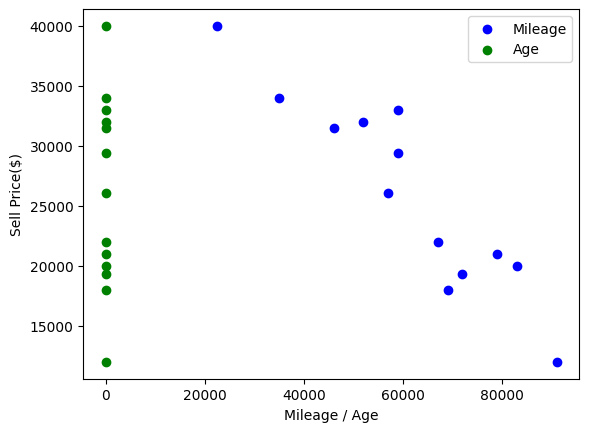

In [5]:
plt.scatter(df['Mileage'], df['Sell Price($)'], color='blue', label='Mileage')
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], color='green', label='Age')
plt.xlabel('Mileage / Age')
plt.ylabel('Sell Price($)')
plt.legend()
plt.show()

In [8]:
dummies = pd.get_dummies(df['Car Model']).astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [11]:
merged = pd.concat([df,dummies.astype(int)],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [13]:
final = merged.drop(['Car Model','Audi A5'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = final.drop(['Sell Price($)'],axis='columns')
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [16]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [17]:
model.fit(X,y)

LinearRegression()

In [18]:
model.predict([[45000,4,0,1]]) # Mileage Age Bmw Merc

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [19]:
model.predict([[86000,7,1,0]]) # Mileage Age Bmw Merc

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])